# Bayesian Signal Denoising and Parameter Optimization for Gravitational Wave Detection in LIGO Data

### Project Overview
This project focuses on the detection and analysis of gravitational wave signals using the LIGO Gravitational Wave Data. Gravitational waves, first predicted by Albert Einstein in 1916, are ripples in spacetime caused by massive astronomical events, such as the merging of black holes. The dataset used in this project corresponds to the first-ever direct detection of gravitational waves, event GW150914, observed by the LIGO detectors on September 14, 2015. This event marked a major scientific breakthrough, confirming a key prediction of Einstein's theory of General Relativity. The uniqueness of this data lies in its historical significance and its inherent challenge: distinguishing a faint gravitational wave signal from background noise. By applying advanced techniques such as Bayesian inference, Gaussian Mixture Models, and Monte Carlo simulations, we aim to optimize the extraction of these weak signals, explore the underlying astrophysical parameters, and improve the detection capabilities of such rare and critical events. This project demonstrates how data science and statistical methods can contribute to cutting-edge scientific discoveries.

### Data Source
The data for this project will be sourced from the LIGO Open Science Center (LOSC), which provides publicly available data from the LIGO experiment. This project will specifically focus on the data related to the first detected gravitational wave event, GW150914, as a case study for applying signal processing and optimization techniques.
Data can be accessed at: LIGO Open Science Center.


In [1]:
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
from pycbc.frame import read_frame
from pycbc.filter import highpass
from pycbc.psd import welch
from pycbc.types import TimeSeries

/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


In [2]:
# URL for the specific LIGO dataset
ligo_data_url = 'https://www.gw-openscience.org/s/events/GW150914/H-H1_LOSC_4_V1-1126259446-32.gwf'
file_name = 'H-H1_LOSC_4_V1-1126259446-32.gwf'
channel_name = 'H1:GWOSC-4KHZ_R1_STRAIN'

In [3]:
## # URL for the specific LIGO dataset
## ligo_data_url = 'https://losc.ligo.org/s6/H-H1_LOSC_4_V1-931174400-4096.gwf'
## file_name = 'H-H1_LOSC_4_V1-931174400-4096.gwf'
## #channel_name = 'H1:GWOSC-4KHZ_R1_STRAIN'

In [4]:
# Step 1: Download the file if not already present
def download_ligo_data(url, file_name):
    if not os.path.exists(file_name):
        print(f"Downloading {file_name}...")
        response = requests.get(url, stream=True)
        with open(file_name, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                if chunk:
                    f.write(chunk)
        print(f"Download complete: {file_name}")
    else:
        print(f"File already exists: {file_name}")

In [5]:
# Step 1: Download the data
download_ligo_data(ligo_data_url, file_name)

File already exists: H-H1_LOSC_4_V1-1126259446-32.gwf


In [6]:
file_path = '../bayesian_gravitational_wave_signal_processing/data/H-H1_LOSC_4_V1-1126259446-32.gwf'
channel_name = 'H1:LOSC-STRAIN'

In [7]:
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt

# Function to load and plot strain data directly by specifying the channel
def load_and_plot_channel(file_path, channel_name):
    try:
        # Attempt to load strain data for the given channel
        strain_data = TimeSeries.read(file_path, channel_name)
        print(f"Successfully loaded data from {channel_name}")
        
        # Plot the strain data
        strain_data.plot()
        plt.show()
    except Exception as e:
        print(f"Error while loading or plotting strain data: {e}")

Successfully loaded data from H1:LOSC-STRAIN


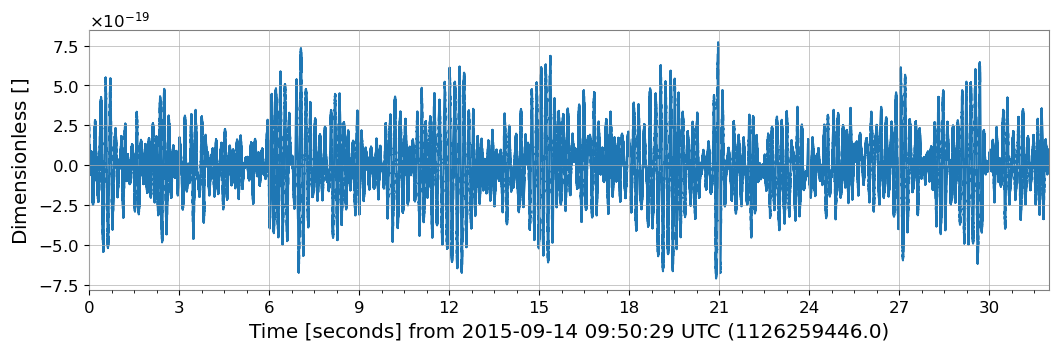

In [8]:
# Load and plot the strain data from the specified channel
load_and_plot_channel(file_path, channel_name)

In [9]:
strain_data = TimeSeries.read(file_path, channel_name)

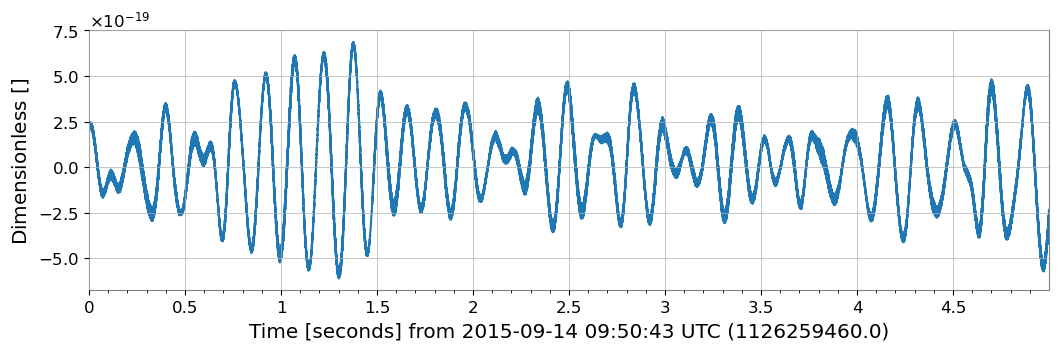

In [10]:
def plot_zoomed_in_data(strain_data, start_time=None, end_time=None):
    # Slice the data between start_time and end_time if provided
    if start_time and end_time:
        zoomed_data = strain_data.crop(start_time, end_time)
    else:
        zoomed_data = strain_data
    
    # Plot the zoomed-in section
    zoomed_data.plot()
    plt.show()

# Example usage:
plot_zoomed_in_data(strain_data, start_time=1126259460, end_time=1126259465)


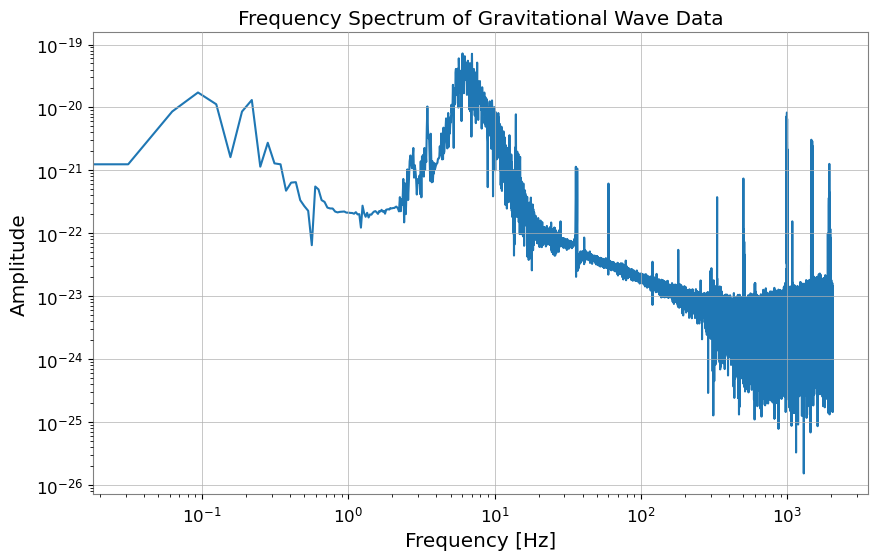

In [11]:
def plot_frequency_spectrum(strain_data):
    # Apply Fourier transform to get frequency components
    fft_data = strain_data.fft()
    
    # Plot the frequency spectrum
    plt.figure(figsize=(10, 6))
    plt.loglog(fft_data.frequencies.value, abs(fft_data).value)
    plt.title('Frequency Spectrum of Gravitational Wave Data')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# Plot the frequency spectrum
plot_frequency_spectrum(strain_data)

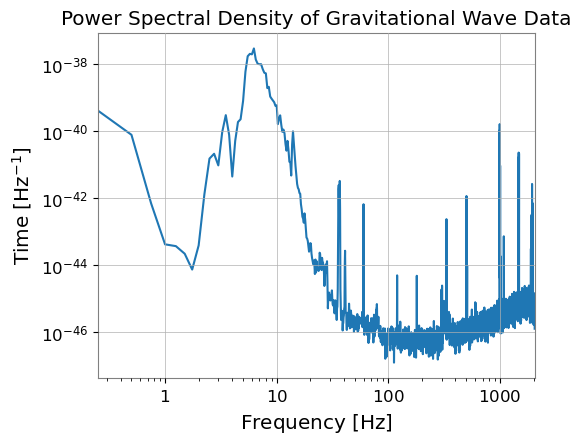

In [12]:
def plot_psd(strain_data):
    psd = strain_data.psd(4)  # 4-second segments for PSD estimation
    psd.plot()
    plt.title('Power Spectral Density of Gravitational Wave Data')
    plt.show()

# Plot the Power Spectral Density
plot_psd(strain_data)


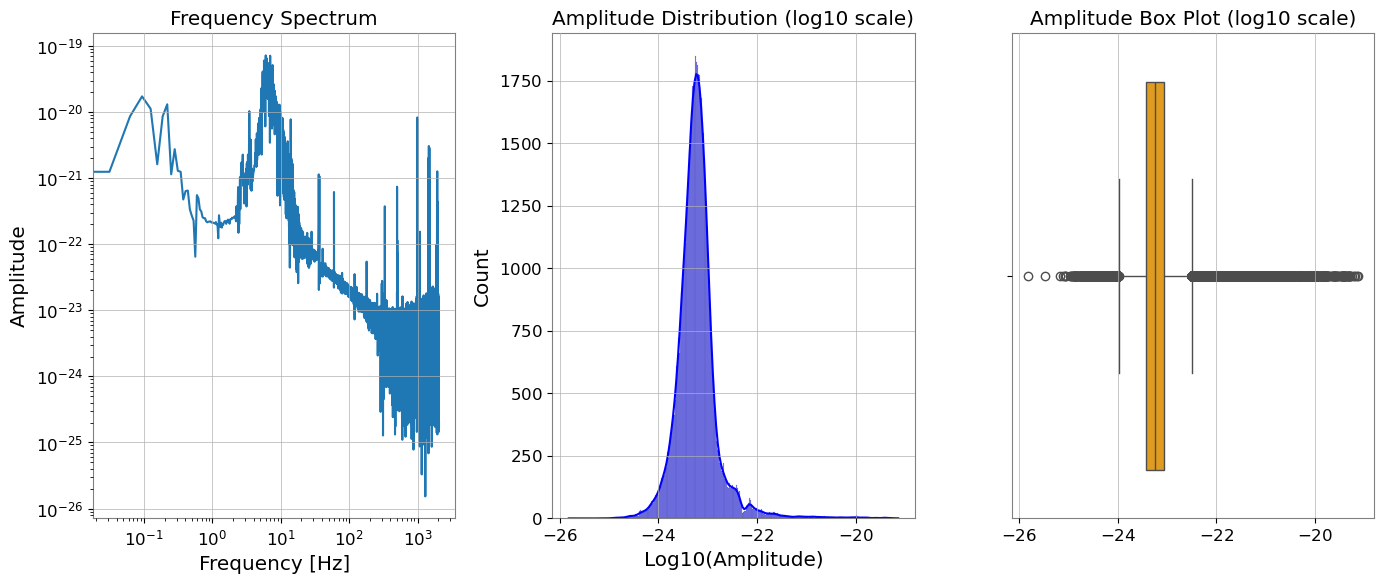

In [13]:
import seaborn as sns
import numpy as np

# Function to plot the frequency spectrum along with distribution and box plot
def plot_frequency_spectrum_with_distributions(strain_data):
    # Apply Fourier transform to get frequency components
    fft_data = strain_data.fft()
    frequencies = fft_data.frequencies.value
    amplitude = abs(fft_data).value
    
    # Plot frequency spectrum
    plt.figure(figsize=(14, 6))
    
    # Frequency spectrum plot (log-log)
    plt.subplot(1, 3, 1)
    plt.loglog(frequencies, amplitude)
    plt.title('Frequency Spectrum')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Distribution plot (histogram + KDE)
    plt.subplot(1, 3, 2)
    sns.histplot(np.log10(amplitude), kde=True, color='blue')
    plt.title('Amplitude Distribution (log10 scale)')
    plt.xlabel('Log10(Amplitude)')
    
    # Box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=np.log10(amplitude), color='orange')
    plt.title('Amplitude Box Plot (log10 scale)')
    
    plt.tight_layout()
    plt.show()

# Call the modified function
plot_frequency_spectrum_with_distributions(strain_data)


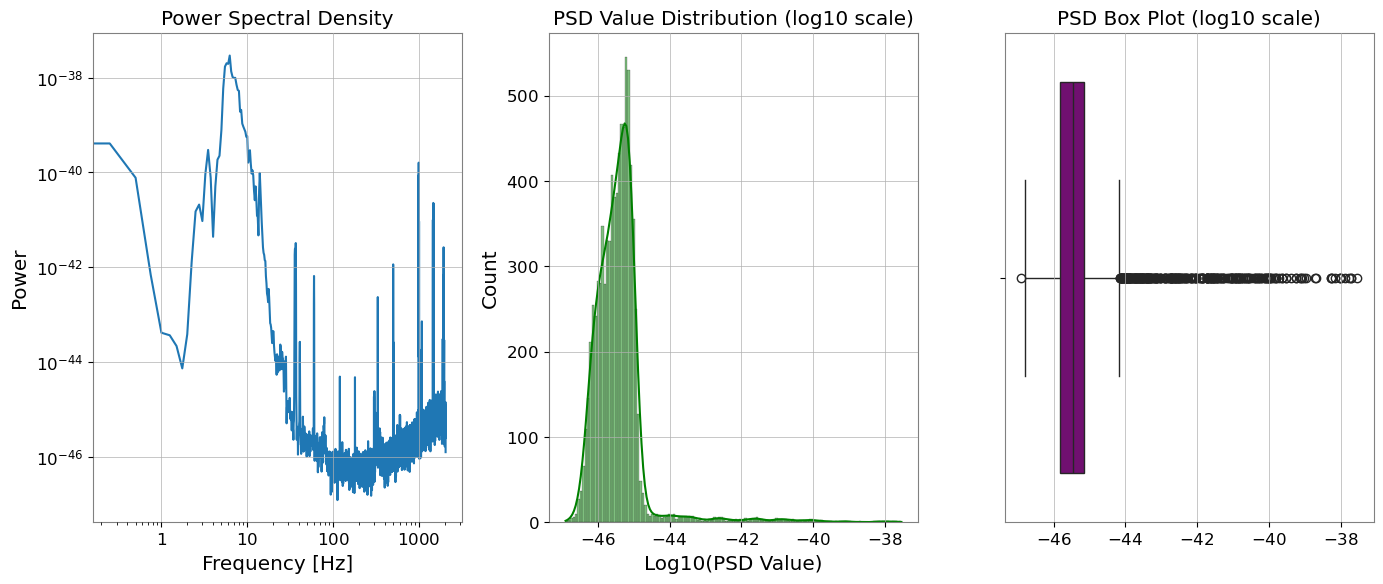

In [14]:
# Function to plot the PSD along with distribution and box plot using Matplotlib
def plot_psd_with_distributions(strain_data):
    # Calculate PSD (Power Spectral Density)
    psd = strain_data.psd(4)
    
    # Extract frequencies and PSD values for manual plotting
    frequencies = psd.frequencies.value
    psd_values = psd.value
    
    # Plot PSD using Matplotlib (log-log)
    plt.figure(figsize=(14, 6))
    
    # PSD plot
    plt.subplot(1, 3, 1)
    plt.loglog(frequencies, psd_values)
    plt.title('Power Spectral Density')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power')
    plt.grid(True)
    
    # Distribution plot (histogram + KDE)
    plt.subplot(1, 3, 2)
    sns.histplot(np.log10(psd_values), kde=True, color='green')
    plt.title('PSD Value Distribution (log10 scale)')
    plt.xlabel('Log10(PSD Value)')
    
    # Box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=np.log10(psd_values), color='purple')
    plt.title('PSD Box Plot (log10 scale)')
    
    plt.tight_layout()
    plt.show()

# Call the modified function
plot_psd_with_distributions(strain_data)


In [15]:
import numpy as np

# Save the strain data and timestamps into NumPy arrays
strain_array = strain_data.value  # The strain data itself
time_array = strain_data.times.value  # The corresponding timestamps

# Save the arrays to disk for later use
np.save('../bayesian_gravitational_wave_signal_processing/data/strain_data.npy', strain_array)
np.save('../bayesian_gravitational_wave_signal_processing/data/time_data.npy', time_array)

# Load them later using:
# strain_array = np.load('strain_data.npy')
# time_array = np.load('time_data.npy')



### Frequency-Domain Analysis (Fourier Transform and Power Spectral Density)

### Why Perform Frequency-Domain Analysis?
In signal processing, analyzing the data in the frequency domain allows us to understand the distribution of energy or power across different frequency components. Gravitational wave signals, like the one from LIGO, typically appear in a specific frequency range. Noise, on the other hand, can be spread across other frequencies. By moving into the frequency domain, we can more effectively separate the signal from the noise.

### Fourier Transform

The Fourier Transform converts a signal from the time domain into the frequency domain. For a signal \( f(t) \), the Fourier transform \( F(f) \) is given by:

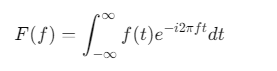

In practice, we use the **Fast Fourier Transform (FFT)** algorithm, which efficiently computes the Discrete Fourier Transform (DFT) of a finite number of sampled points.

The FFT of the strain data will give us the frequency components of the signal.


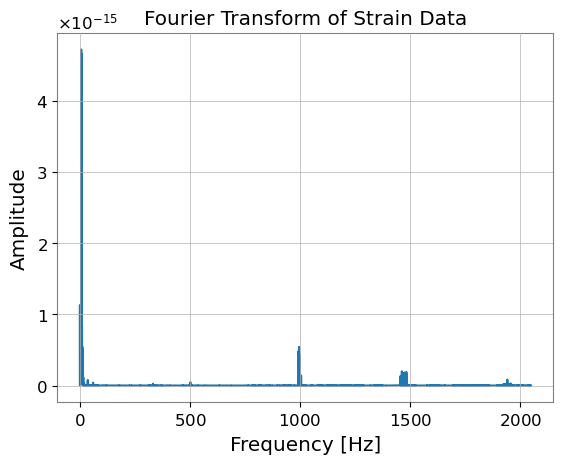

In [16]:
from scipy.fft import fft, fftfreq

# Number of sample points
N = len(strain_array)

# Sample spacing (inverse of the sample rate)
T = strain_data.dt.value  # Delta time from strain data

# Perform Fourier Transform
freqs = fftfreq(N, T)  # Frequencies associated with the FFT components
fft_values = fft(strain_array)  # Compute the FFT

# Only plot the positive frequencies and corresponding FFT components
positive_freqs = freqs[:N // 2]
positive_fft_values = np.abs(fft_values[:N // 2])

# Plot the Fourier Transform
import matplotlib.pyplot as plt
plt.plot(positive_freqs, positive_fft_values)
plt.title('Fourier Transform of Strain Data')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()


### Power Spectral Density (PSD)
The Power Spectral Density (PSD) shows how the power of a signal is distributed across different frequencies. It is particularly useful in understanding where the dominant frequency components of a signal are and which parts of the spectrum are dominated by noise.

We use Welch's method to estimate the PSD. Welch’s method splits the data into overlapping segments, computes the periodogram for each segment, and then averages them to obtain the final PSD estimate. The goal is to reduce variance in the PSD estimation.

Mathematically, for a signal x(t). the PSD P(f) is:
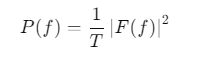

F(f) is the Fourier Transform of 
𝑥
(
𝑡
)
over a time window 
𝑇
.

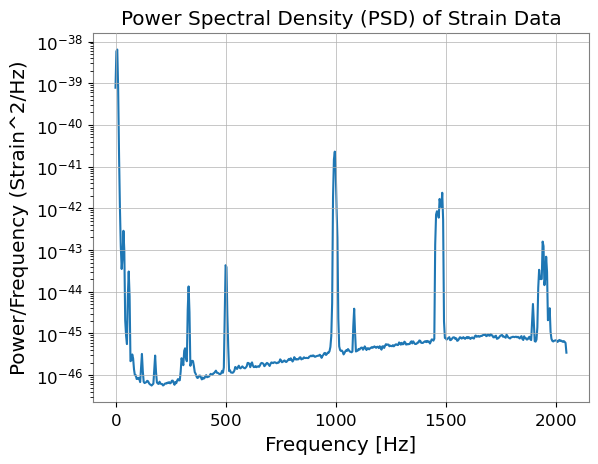

In [17]:
from scipy.signal import welch

# Compute the Power Spectral Density (using Welch's method)
frequencies, psd_values = welch(strain_array, fs=1/T, nperseg=1024)

# Plot the PSD
plt.semilogy(frequencies, psd_values)
plt.title('Power Spectral Density (PSD) of Strain Data')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power/Frequency (Strain^2/Hz)')
plt.show()


### Step 3: Denoising Using Gaussian Mixture Models (GMM)
Why Use GMM for Denoising?
Gaussian Mixture Models (GMM) are a probabilistic model used to represent data points as a mixture of several Gaussian distributions. The key advantage of using GMM for denoising is that it can probabilistically assign each data point to either signal or noise by fitting different Gaussian distributions to the data. This allows us to separate the dominant signal from the background noise.

Gaussian Mixture Model (GMM)
The GMM assumes that the data is generated from a mixture of 
𝐾
K Gaussian distributions, each with its own mean 
𝜇
𝑘

​
 , covariance 
Σ
𝑘

​
 , and weight 
𝜋
𝑘

​
 . The probability density function for the mixture is:
 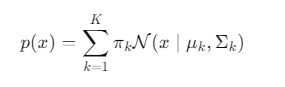

 Where 
𝑁
(
𝑥
∣
𝜇
𝑘
,
Σ
𝑘
)
 is the normal distribution for the 
𝑘
-th component.

In our case, we use two components (signal and noise), and apply the GMM to identify the different clusters.

In [18]:
from sklearn.mixture import GaussianMixture

from sklearn.preprocessing import StandardScaler

# Normalize the strain data
scaler = StandardScaler()
strain_normalized = scaler.fit_transform(strain_array.reshape(-1, 1))

# Apply GMM to normalized data
gmm = GaussianMixture(n_components=2)  # Try with 2 components
gmm.fit(strain_normalized)

# Get the GMM component predictions (signal vs noise)
gmm_labels = gmm.predict(strain_normalized)

# Check the labels again
unique_labels, counts = np.unique(gmm_labels, return_counts=True)
print(f"GMM Labels: {unique_labels}")
print(f"Counts for each label: {counts}")


GMM Labels: [0 1]
Counts for each label: [59904 71168]


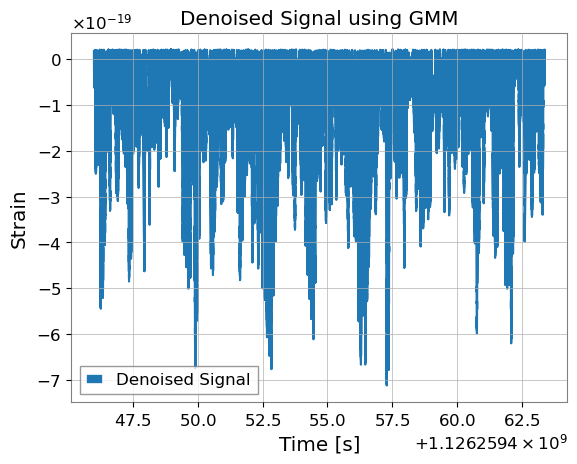

In [19]:
# Assuming component 1 is signal and component 0 is noise
signal_component = strain_array[gmm_labels == 1]  # Adjust based on labels
noise_component = strain_array[gmm_labels == 0]  # Adjust based on labels

# Plot the denoised signal
if len(signal_component) > 0:
    plt.plot(time_array[:len(signal_component)], signal_component, label='Denoised Signal')
    plt.title('Denoised Signal using GMM')
    plt.xlabel('Time [s]')
    plt.ylabel('Strain')
    plt.legend()
    plt.show()
else:
    print("Signal component is still empty, consider adjusting the GMM.")


### Adding synthetic noise to the data and using GMM  to filter the noise

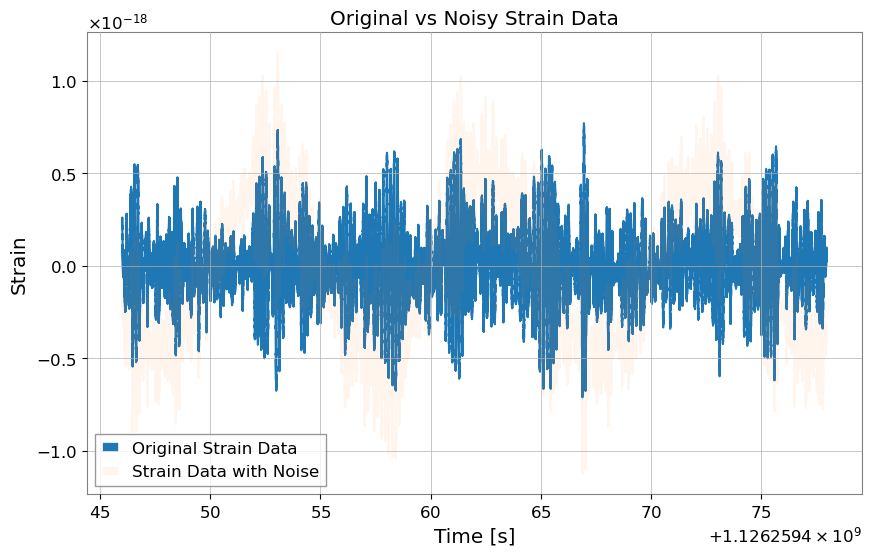

In [50]:
np.random.seed(42)
mean=np.mean(strain_array)
sd=np.std(strain_array)


# Generate synthetic sinusoidal noise
frequency = .1  # Frequency of the sine wave (Hz)
amplitude = 2*sd  # Amplitude of the noise
sin_wave_noise = amplitude * np.sin(2 * np.pi * frequency * time_array)

# Generate synthetic Gaussian noise (mean = 0, standard deviation = 0.001)


noise =sin_wave_noise#+ np.random.normal(mean, sd, size=strain_array.shape)

# Add the synthetic noise to the original strain data
noisy_data = strain_array + noise

# Save or visualize the noisy data
np.save('noisy_data.npy', noisy_data)

# Plot the original and noisy data for comparison
plt.figure(figsize=(10, 6))
plt.plot(time_array, strain_array, label='Original Strain Data')
plt.plot(time_array, noisy_data, label='Strain Data with Noise', alpha=0.07)
plt.title('Original vs Noisy Strain Data')
plt.xlabel('Time [s]')
plt.ylabel('Strain')
plt.legend()
plt.show()

In [51]:
# Normalize the noisy data
scaler = StandardScaler()
noisy_data_normalized = scaler.fit_transform(noisy_data.reshape(-1, 1))
# Apply GMM to the noisy data (try with 3 components: signal and noise)
gmm = GaussianMixture(n_components=3)
gmm.fit(noisy_data_normalized)

# Get GMM predictions (signal vs noise)
gmm_labels = gmm.predict(noisy_data_normalized)

# Check how GMM has clustered the data
unique_labels, counts = np.unique(gmm_labels, return_counts=True)
print(f"GMM Labels: {unique_labels}")
print(f"Counts for each label: {counts}")


GMM Labels: [0 1 2]
Counts for each label: [42748 44655 43669]


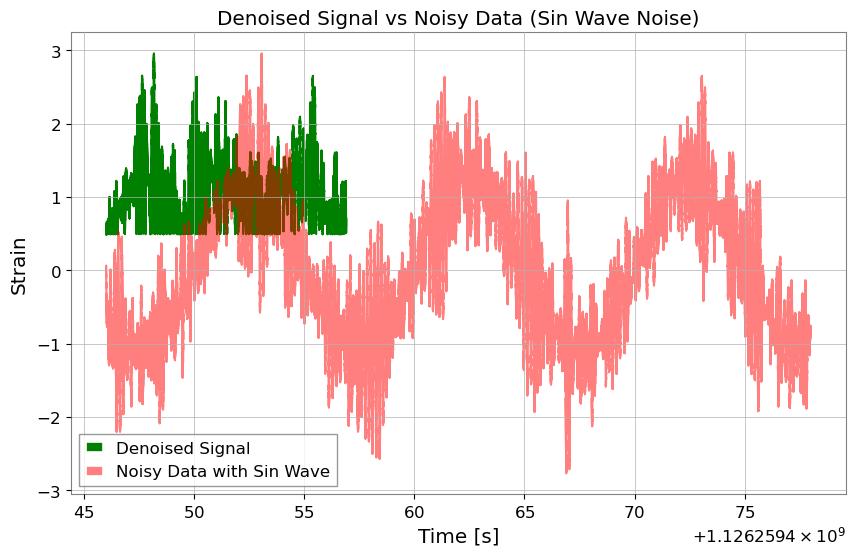

In [55]:
# Separate signal and noise based on GMM labels
signal_component = noisy_data_normalized[gmm_labels == 1]  # Adjust label based on your GMM results
noise_component = noisy_data_normalized[gmm_labels == 0]  # Adjust label based on your GMM results
anomali_component = noisy_data_normalized[gmm_labels == 2] 
# Plot the original noisy data and the denoised signal
plt.figure(figsize=(10, 6))
plt.plot(time_array[:len(signal_component)], signal_component, label='Denoised Signal', color='green')
plt.plot(time_array, noisy_data_normalized, label='Noisy Data with Sin Wave', alpha=0.5, color='red')
plt.title('Denoised Signal vs Noisy Data (Sin Wave Noise)')
plt.xlabel('Time [s]')
plt.ylabel('Strain')
plt.legend()
plt.show()

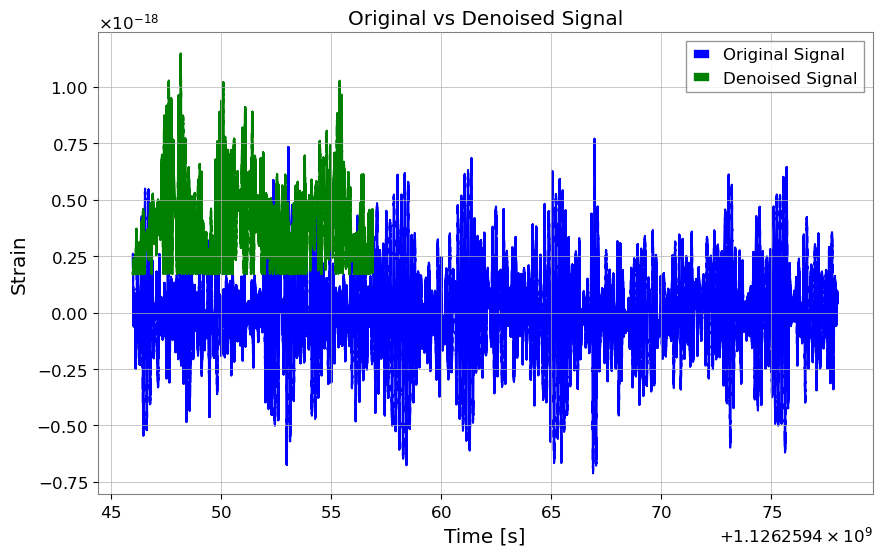

In [56]:
# Undo the normalization of the signal component
denoised_signal_original_scale = scaler.inverse_transform(signal_component.reshape(-1, 1)).flatten()

# Compare the original signal with the denoised signal
plt.figure(figsize=(10, 6))
plt.plot(time_array, strain_array, label='Original Signal', color='blue')
plt.plot(time_array[:len(denoised_signal_original_scale)], denoised_signal_original_scale, label='Denoised Signal', color='green')
plt.title('Original vs Denoised Signal')
plt.xlabel('Time [s]')
plt.ylabel('Strain')
plt.legend()
plt.show()


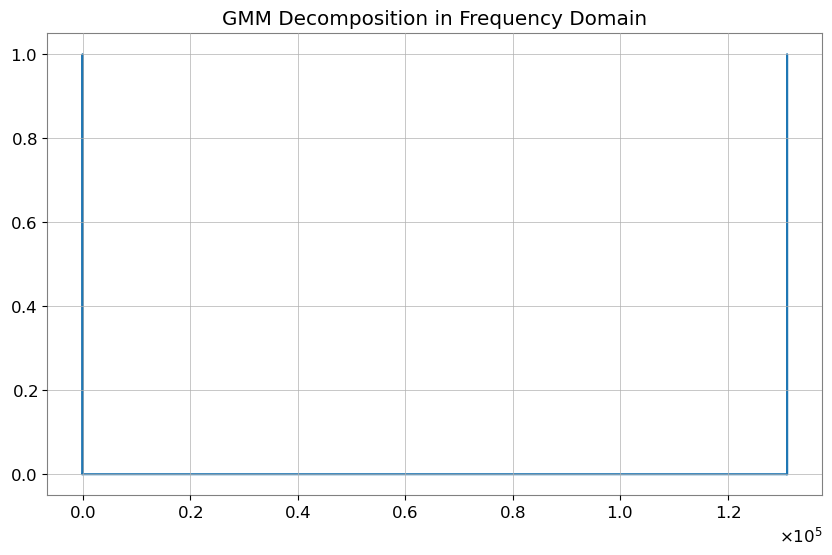

In [57]:
from scipy.fft import fft

# Perform Fourier Transform on the noisy data
fft_noisy_data = fft(noisy_data)

# Take only the real part and absolute values of the FFT (ignoring complex components)
fft_noisy_data_abs = np.abs(fft_noisy_data)

# Reshape for GMM and normalize
fft_noisy_data_abs = fft_noisy_data_abs.reshape(-1, 1)
scaler = StandardScaler()
fft_noisy_data_normalized = scaler.fit_transform(fft_noisy_data_abs)

# Apply GMM to the Fourier-transformed data
gmm = GaussianMixture(n_components=2)
gmm.fit(fft_noisy_data_normalized)

# Get GMM predictions
gmm_labels_fft = gmm.predict(fft_noisy_data_normalized)

# Plot the frequency domain signal with separation
plt.figure(figsize=(10, 6))
plt.plot(gmm_labels_fft, label='GMM labels in Frequency Domain')
plt.title('GMM Decomposition in Frequency Domain')
plt.show()


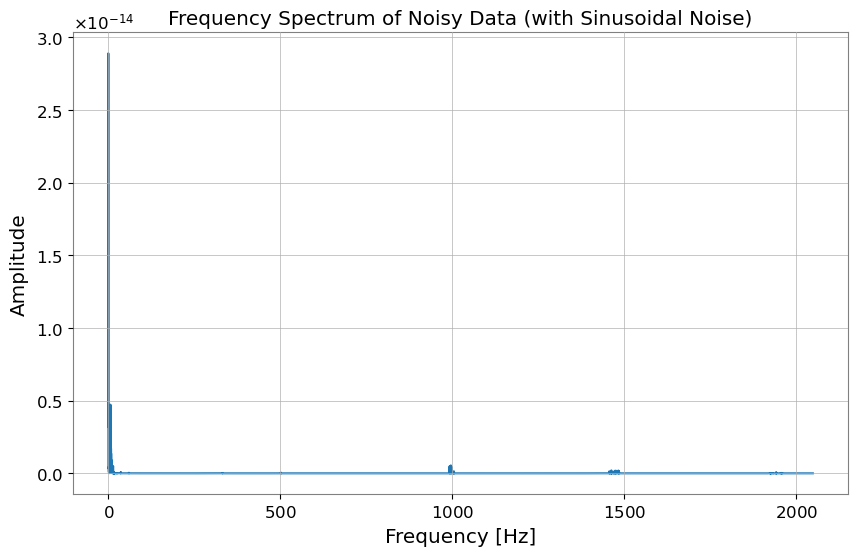

In [58]:
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# Perform Fourier Transform on the noisy data
N = len(noisy_data)
T = strain_data.dt.value  # Sample spacing (inverse of sample rate)

# Compute the Fourier Transform of the noisy data
fft_noisy_data = fft(noisy_data)
frequencies = fftfreq(N, T)

# Only keep the positive frequencies
positive_freqs = frequencies[:N // 2]
positive_fft_values = np.abs(fft_noisy_data[:N // 2])

# Plot the frequency spectrum of the noisy data
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, positive_fft_values)
plt.title('Frequency Spectrum of Noisy Data (with Sinusoidal Noise)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()


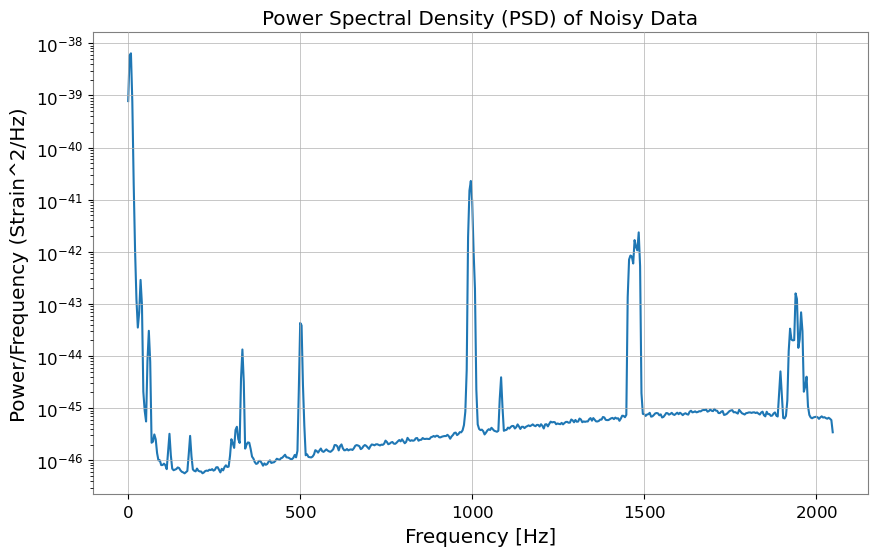

In [59]:
from scipy.signal import welch

# Compute Power Spectral Density (using Welch's method)
frequencies_psd, psd_values = welch(noisy_data, fs=1/T, nperseg=1024)

# Plot the Power Spectral Density (PSD)
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies_psd, psd_values)
plt.title('Power Spectral Density (PSD) of Noisy Data')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power/Frequency (Strain^2/Hz)')
plt.show()


## Objective: Bayesian Inference for Signal Parameter Estimation
We aim to estimate key parameters of the gravitational wave signal, such as amplitude, frequency, and phase, using Bayesian inference. This will allow us to model the posterior distribution of these parameters and quantify the uncertainty using techniques like Markov Chain Monte Carlo (MCMC).

Bayesian Inference for Signal Parameter Estimation
We’ll break this into steps:

1) Define the model: Create a model for the gravitational wave signal.
2) Define priors: Set prior distributions for amplitude, frequency, and phase.
3) Compute likelihood: Define the likelihood function.
4) Use MCMC to sample from the posterior distribution.

In [113]:
import numpy as np

# Define the model function
def signal_model(t, A, f, phi):
    return A * np.sin(2 * np.pi * f * t + phi)
# Define priors for amplitude (A), frequency (f), and phase (phi)

# Define normal priors for amplitude (A), frequency (f), and phase (phi)
def prior_A(A, mu_A=0.5, sigma_A=0.25):
    return (1 / (sigma_A * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((A - mu_A) / sigma_A) ** 2)

def prior_f(f, mu_f=50.0, sigma_f=1):
    return (1 / (sigma_f * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((f - mu_f) / sigma_f) ** 2)

def prior_phi(phi, mu_phi=0, sigma_phi=np.pi/4):
    return (1 / (sigma_phi * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((phi - mu_phi) / sigma_phi) ** 2)



### Define the Likelihood Function
The likelihood represents how well the model fits the observed data. Assuming the errors are Gaussian, the likelihood can be written as:
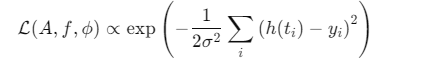
 
Where 
𝑦
𝑖

​
  are the observed data points, and 
ℎ
(
𝑡
𝑖
)
 is the model.

In [114]:
# Define the likelihood function
def likelihood(y, t, A, f, phi, sigma, eps=1e-10):
    model = signal_model(t, A, f, phi)
    residuals = y - model
    return np.exp(-0.5 * np.sum((residuals / sigma) ** 2)) + eps  # Add a small epsilon to avoid zero likelihood



In [115]:
# Define the posterior distribution using normal priors
def posterior(y, t, A, f, phi, sigma, eps=1e-10):
    # Calculate likelihood and normal priors
    likelihood_val = likelihood(y, t, A, f, phi, sigma)
    prior_A_val = prior_A(A)
    prior_f_val = prior_f(f)
    prior_phi_val = prior_phi(phi)
    
    # Calculate posterior
    posterior_val = likelihood_val * prior_A_val * prior_f_val * prior_phi_val
    return posterior_val + eps  # Add a small epsilon to avoid zero posterior


###  MCMC Sampling (Metropolis-Hastings Algorithm)
To sample from the posterior distribution, we can implement the Metropolis-Hastings algorithm. This will allow us to explore the posterior space and estimate the parameters.

In [116]:
import random

# Metropolis-Hastings MCMC with safeguard for posterior
def metropolis_hastings(y, t, sigma, initial_params, num_samples, step_size):
    A_current, f_current, phi_current = initial_params
    samples = []
    
    for _ in range(num_samples):
        # Propose new parameters
        A_proposed = A_current + np.random.normal(0, step_size)
        f_proposed = f_current + np.random.normal(0, step_size)
        phi_proposed = phi_current + np.random.normal(0, step_size)
        
        # Calculate posterior for current and proposed values
        p_current = posterior(y, t, A_current, f_current, phi_current, sigma)
        p_proposed = posterior(y, t, A_proposed, f_proposed, phi_proposed, sigma)
        
        # Check if p_current or p_proposed are non-zero to avoid division by zero
        if p_current == 0:
            p_current = 1e-10  # Replace with small value to avoid division by zero
        if p_proposed == 0:
            p_proposed = 1e-10
        
        # Acceptance ratio
        acceptance_ratio = p_proposed / p_current
        
        # Accept or reject
        if acceptance_ratio > random.uniform(0, 1):
            A_current, f_current, phi_current = A_proposed, f_proposed, phi_proposed
        
        # Store the current parameters
        samples.append([A_current, f_current, phi_current])
    
    return np.array(samples)


In [117]:
# Define the initial parameter guesses
initial_params = [1.0, 50.0, 0.0]  # Initial guesses for A, f, and phi
num_samples = 5000  # Number of MCMC samples
step_size = 0.01  # Step size for the MCMC

# Define the standard deviation of the noise in the data
sigma = 0.001  # You can estimate this based on the noise in your data

# Run MCMC sampling
samples = metropolis_hastings(strain_array, time_array, sigma, initial_params, num_samples, step_size)

# Extract the samples for A, f, and phi
A_samples = samples[:, 0]
f_samples = samples[:, 1]
phi_samples = samples[:, 2]


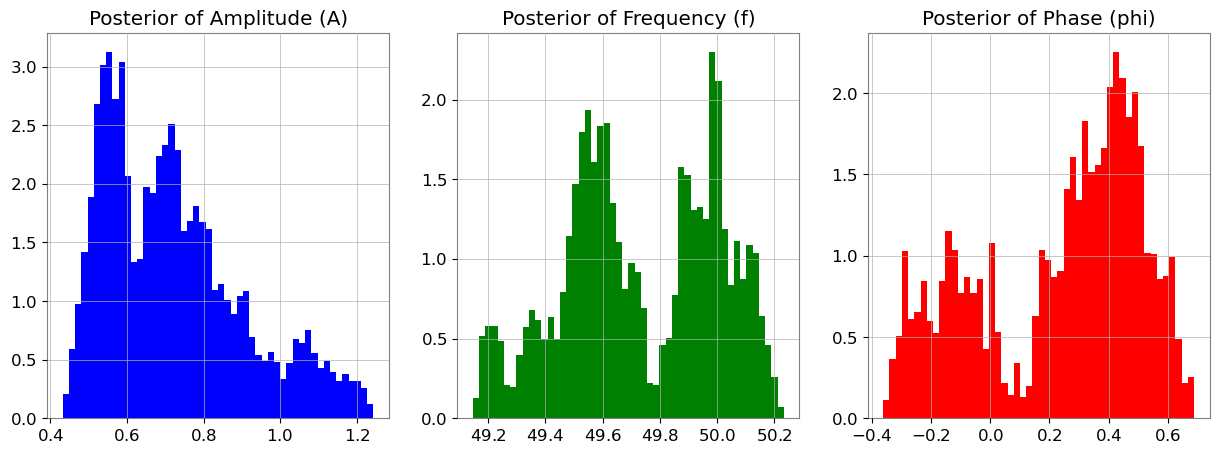

In [118]:
import matplotlib.pyplot as plt

# Plot the posterior distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(A_samples, bins=50, density=True, color='blue')
plt.title('Posterior of Amplitude (A)')

plt.subplot(1, 3, 2)
plt.hist(f_samples, bins=50, density=True, color='green')
plt.title('Posterior of Frequency (f)')

plt.subplot(1, 3, 3)
plt.hist(phi_samples, bins=50, density=True, color='red')
plt.title('Posterior of Phase (phi)')

plt.show()


In [119]:
# Summary statistics for the posterior distributions
A_mean = np.mean(A_samples)
A_credible_interval = np.percentile(A_samples, [2.5, 97.5])

f_mean = np.mean(f_samples)
f_credible_interval = np.percentile(f_samples, [2.5, 97.5])

phi_mean = np.mean(phi_samples)
phi_credible_interval = np.percentile(phi_samples, [2.5, 97.5])

print(f"Amplitude (A): Mean = {A_mean}, 95% CI = {A_credible_interval}")
print(f"Frequency (f): Mean = {f_mean}, 95% CI = {f_credible_interval}")
print(f"Phase (phi): Mean = {phi_mean}, 95% CI = {phi_credible_interval}")


Amplitude (A): Mean = 0.7221966682820334, 95% CI = [0.47763482 1.15649766]
Frequency (f): Mean = 49.73358963673882, 95% CI = [49.21031929 50.15472381]
Phase (phi): Mean = 0.2377219337092421, 95% CI = [-0.29522306  0.6218542 ]


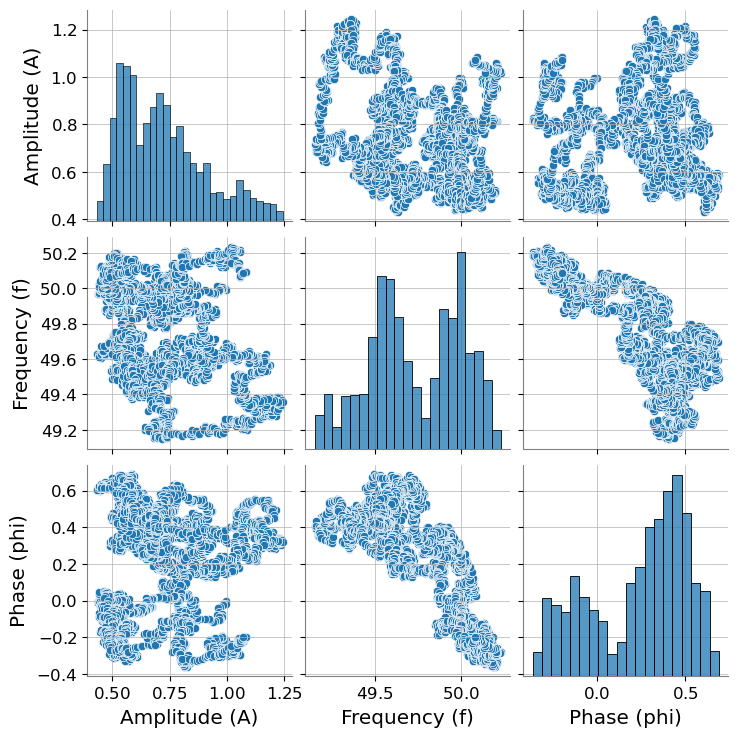

In [120]:
import pandas as pd
# Create a DataFrame with the samples
posterior_df = pd.DataFrame({'Amplitude (A)': A_samples, 'Frequency (f)': f_samples, 'Phase (phi)': phi_samples})

# Pair plot to visualize joint distributions
sns.pairplot(posterior_df)
plt.show()


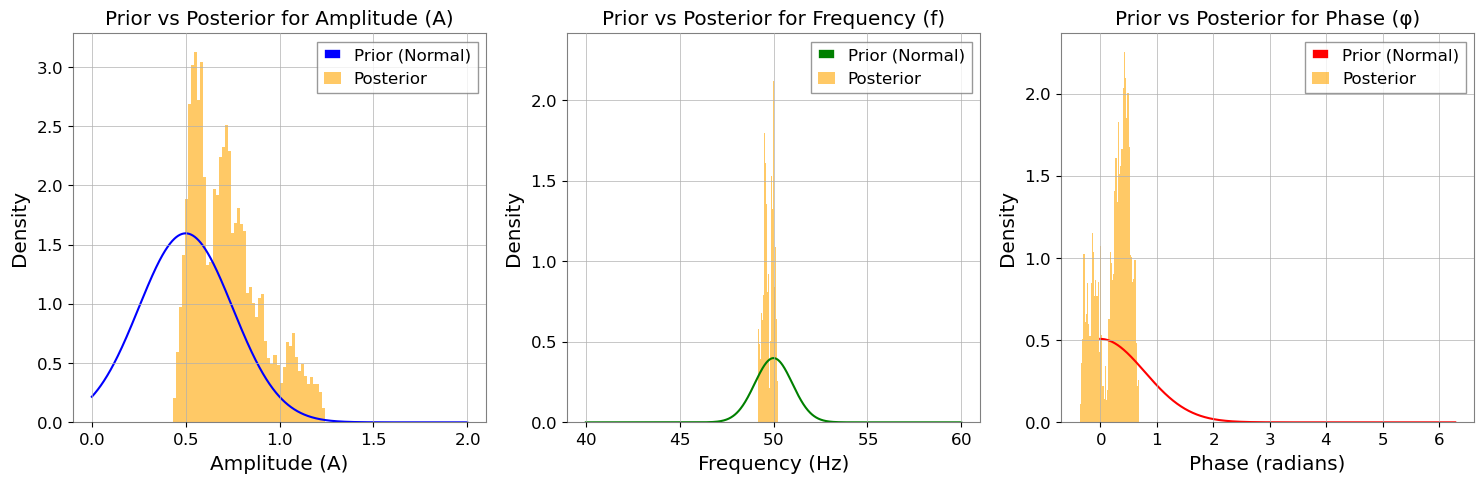

In [121]:
import matplotlib.pyplot as plt

# Define ranges for priors
A_range = np.linspace(0, 2, 1000)  # Range for amplitude
f_range = np.linspace(40, 60, 1000)  # Range for frequency
phi_range = np.linspace(0, 2 * np.pi, 1000)  # Range for phase

# Calculate the normal prior densities
prior_A_density = prior_A(A_range)
prior_f_density = prior_f(f_range)
prior_phi_density = prior_phi(phi_range)

# Plot the prior distributions and overlay the posterior distributions
plt.figure(figsize=(15, 5))

# Amplitude (A)
plt.subplot(1, 3, 1)
plt.plot(A_range, prior_A_density, label='Prior (Normal)', color='blue')
plt.hist(A_samples, bins=50, density=True, alpha=0.6, label='Posterior', color='orange')
plt.title('Prior vs Posterior for Amplitude (A)')
plt.xlabel('Amplitude (A)')
plt.ylabel('Density')
plt.legend()

# Frequency (f)
plt.subplot(1, 3, 2)
plt.plot(f_range, prior_f_density, label='Prior (Normal)', color='green')
plt.hist(f_samples, bins=50, density=True, alpha=0.6, label='Posterior', color='orange')
plt.title('Prior vs Posterior for Frequency (f)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Density')
plt.legend()

# Phase (φ)
plt.subplot(1, 3, 3)
plt.plot(phi_range, prior_phi_density, label='Prior (Normal)', color='red')
plt.hist(phi_samples, bins=50, density=True, alpha=0.6, label='Posterior', color='orange')
plt.title('Prior vs Posterior for Phase (φ)')
plt.xlabel('Phase (radians)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


In [122]:
#To do: Bayesian optimisation of prior and posterior


## Objective: Monte Carlo Simulation for Synthetic Data Generation
Generate synthetic gravitational wave signals that mimic the real signals but include controlled noise. These synthetic signals can be used to test the performance of your signal extraction and denoising methods.

### Steps for Monte Carlo Simulation:
1) Define the signal model: Use a sine wave model similar to what you've done in previous objectives.
2) Add random noise: Add Gaussian noise or any other noise pattern to simulate realistic signal conditions.
3) Repeat the process: Run multiple simulations to generate a diverse set of synthetic signals.
4) Save and evaluate the data: Save the simulated data and visualize the results to ensure the synthetic signals look reasonable.

In [123]:
# Define the signal model
def signal_model(t, A, f, phi):
    return A * np.sin(2 * np.pi * f * t + phi)

# Time array (representing 1 second of data sampled at 4096 Hz)
fs = 4096  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time from 0 to 1 second

# Generate the signal parameters (e.g., amplitude, frequency, and phase)
A_true = 1.0  # True amplitude
f_true = 50.0  # True frequency
phi_true = 0.0  # True phase


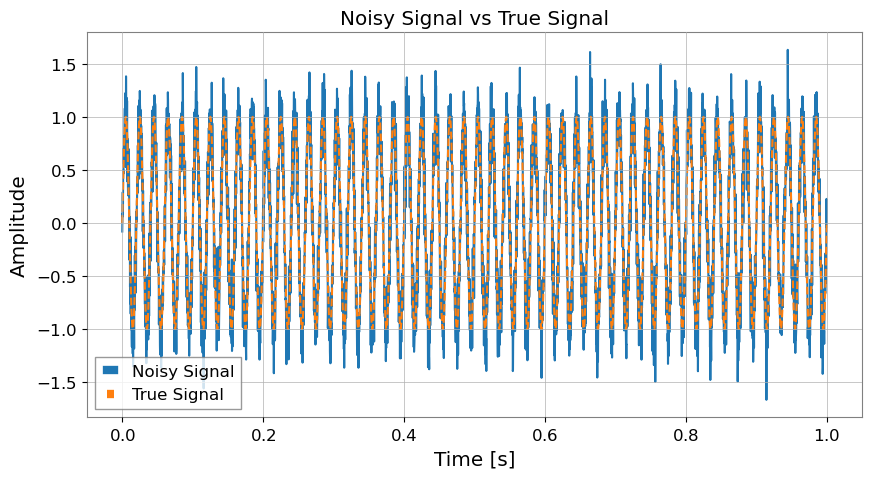

In [124]:
# Define the noise level
noise_level = 0.2  # Standard deviation of the noise

# Generate the noisy signal
noise = np.random.normal(0, noise_level, size=t.shape)
noisy_signal = signal_model(t, A_true, f_true, phi_true) + noise

# Visualize the noisy signal
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(t, noisy_signal, label='Noisy Signal')
plt.plot(t, signal_model(t, A_true, f_true, phi_true), label='True Signal', linestyle='dashed')
plt.title('Noisy Signal vs True Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


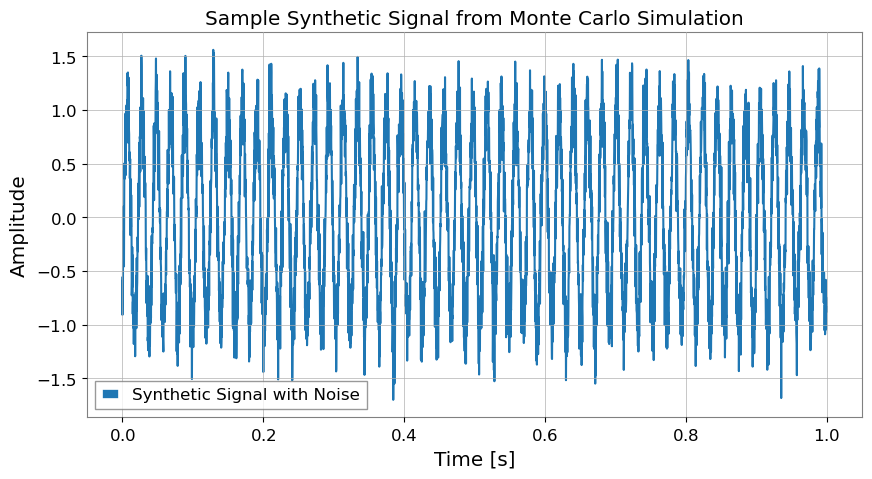

In [126]:
# Monte Carlo simulation to generate multiple synthetic signals
def monte_carlo_simulation(num_simulations, fs, noise_level):
    signals = []
    for _ in range(num_simulations):
        # Randomly generate amplitude, frequency, and phase from normal distributions
        A = np.random.normal(1.0, 0.1)  # Amplitude mean=1, std=0.1
        f = np.random.normal(50.0, 5.0)  # Frequency mean=50 Hz, std=5 Hz
        phi = np.random.uniform(0, 2 * np.pi)  # Phase uniformly distributed between 0 and 2π
        
        # Generate the clean signal
        signal = signal_model(t, A, f, phi)
        
        # Add noise
        noisy_signal = signal + np.random.normal(0, noise_level, size=t.shape)
        
        # Save the signal
        signals.append(noisy_signal)
    
    return np.array(signals)

# Run Monte Carlo simulation for 100 synthetic signals
num_simulations = 1000
synthetic_signals = monte_carlo_simulation(num_simulations, fs, noise_level)

# Visualize one of the synthetic signals
plt.figure(figsize=(10, 5))
plt.plot(t, synthetic_signals[0], label='Synthetic Signal with Noise')
plt.title('Sample Synthetic Signal from Monte Carlo Simulation')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [127]:
# Save the synthetic data to a file
np.save('../bayesian_gravitational_wave_signal_processing/data/synthetic_signals.npy', synthetic_signals)  # Save as a NumPy file

### Bayesian Optimization for Signal Extraction Parameters
To improve performance, bayesian Optimization is used to optimize the hyperparameters of the signal extraction algorithms (e.g., parameters in filtering, denoising, or GMM). The goal is to maximize the SNR or minimize some error metric to ensure better separation of the true signal from the noise.
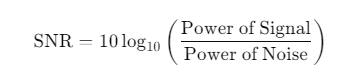

#### Choose Hyperparameters to Optimize:
    1) Amplitude threshold: The threshold to distinguish between signal and noise.
    2) Noise level: To tune the model’s sensitivity to different noise levels.
    3) GMM component count: If using Gaussian Mixture Models, you can optimize the number of components.
### Set Up Bayesian Optimization:
Gaussian Process to model the objective function and use Bayesian Optimization to search for the best hyperparameters that maximize SNR.

In [128]:
# Function to compute Signal-to-Noise Ratio (SNR)
def compute_snr(signal, noisy_signal):
    # Compute the power of the signal and the noise
    signal_power = np.mean(signal ** 2)
    noise_power = np.mean((noisy_signal - signal) ** 2)
    
    # Calculate SNR in decibels (dB)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr


In [146]:
# Define the objective function for optimization (we're maximizing SNR)
# Objective function with smoothed SNR (averaging over multiple runs)
def objective_function(params, num_runs=5):
    noise_level = params[0]
    snr_values = []
    
    # Run the simulation multiple times to smooth out the SNR calculation
    for _ in range(num_runs):
        # Generate the true signal and add noise
        A_true = 1.0
        f_true = 50.0
        phi_true = 0.0
        true_signal = signal_model(t, A_true, f_true, phi_true)
        noisy_signal = true_signal + np.random.normal(0, noise_level, size=t.shape)
        
        # Compute SNR for this noisy signal
        snr = compute_snr(true_signal, noisy_signal)
        snr_values.append(snr)
    
    # Return the average SNR over multiple runs
    return -np.mean(snr_values)  # We return negative SNR because we are minimizing


In [147]:
# Expected Improvement acquisition function
def expected_improvement(x, gp, y_max):
    mu, sigma = gp.predict(x.reshape(-1, 1), return_std=True)
    z = (mu - y_max) / sigma
    return (mu - y_max) * norm.cdf(z) + sigma * norm.pdf(z)

# Define time array (1 second of data sampled at 4096 Hz)
fs = 4096  # Sampling frequency
t = np.linspace(0, 1, fs)  # Time from 0 to 1 second

# Define the kernel for the Gaussian Process (using RBF kernel here for better fitting)
kernel = RBF(length_scale=0.5, length_scale_bounds=(1e-4, 10))

# Initialize Gaussian Process Regressor
gp = GaussianProcessRegressor(kernel=kernel)

# Initial random samples to start Bayesian Optimization
initial_params = np.random.uniform(0.01, 0.5, size=(5, 1))  # 5 initial samples
initial_snr_values = np.array([objective_function(p) for p in initial_params])

# Train the Gaussian Process with the initial points
gp.fit(initial_params, initial_snr_values)


/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=RBF(length_scale=0.5))

In [148]:
# Bayesian Optimization loop using Expected Improvement
def bayesian_optimization(initial_params, initial_snr_values, iterations=10):
    snr_history = []
    
    for i in range(iterations):
        # Expected Improvement acquisition function
        y_max = np.max(initial_snr_values)
        candidates = np.random.uniform(0.01, 0.5, size=(100, 1))  # Sample 100 candidates
        ei_values = np.array([expected_improvement(x, gp, y_max) for x in candidates])
        new_params = candidates[np.argmax(ei_values)]  # Select the candidate with the highest EI
        
        # Evaluate the objective function for the new parameter set
        snr_actual = objective_function(new_params)
        
        # Add the new point to the dataset
        initial_params = np.vstack((initial_params, new_params))
        initial_snr_values = np.append(initial_snr_values, snr_actual)
        
        # Re-train the Gaussian Process with the new data
        gp.fit(initial_params, initial_snr_values)

        # Track SNR over iterations
        snr_history.append(-snr_actual)  # Save the positive SNR for plotting
        
        # Print the progress after each iteration
        print(f"Iteration {i + 1}/{iterations}: Proposed Params: {new_params}, SNR: {-snr_actual}")
        
    return initial_params, -initial_snr_values, snr_history  # Return the best parameters and SNR


In [149]:
# Run the Bayesian Optimization loop
best_params, snr_values, snr_history = bayesian_optimization(initial_params, initial_snr_values, iterations=50)

# Extract the best hyperparameters (noise level that maximized the SNR)
best_noise_level = best_params[np.argmax(snr_values)]
print(f"Optimal Noise Level: {best_noise_level}")

/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sk

Iteration 1/50: Proposed Params: [0.1485307], SNR: 13.532383007339728
Iteration 2/50: Proposed Params: [0.41887171], SNR: 4.570073114914313
Iteration 3/50: Proposed Params: [0.25344113], SNR: 8.902228004015077
Iteration 4/50: Proposed Params: [0.16316975], SNR: 12.684062786020828
Iteration 5/50: Proposed Params: [0.44892461], SNR: 3.9416208345659456
Iteration 6/50: Proposed Params: [0.49898935], SNR: 3.0321475899890733
Iteration 7/50: Proposed Params: [0.10578969], SNR: 16.499826406100173
Iteration 8/50: Proposed Params: [0.02336851], SNR: 29.61838432558263
Iteration 9/50: Proposed Params: [0.26633856], SNR: 8.533884509156746


/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sk

Iteration 10/50: Proposed Params: [0.44274469], SNR: 4.006151598646304
Iteration 11/50: Proposed Params: [0.13783444], SNR: 14.223095330507752
Iteration 12/50: Proposed Params: [0.32582184], SNR: 6.696042531682915
Iteration 13/50: Proposed Params: [0.06718778], SNR: 20.443170611409016
Iteration 14/50: Proposed Params: [0.36148149], SNR: 5.847259912429037
Iteration 15/50: Proposed Params: [0.40837579], SNR: 4.780514010406715
Iteration 16/50: Proposed Params: [0.43341902], SNR: 4.238788217828804
Iteration 17/50: Proposed Params: [0.17939322], SNR: 11.875063977250853
Iteration 18/50: Proposed Params: [0.38131092], SNR: 5.3150168904228945
Iteration 19/50: Proposed Params: [0.1429878], SNR: 13.875024786130714


/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sk

Iteration 20/50: Proposed Params: [0.34325872], SNR: 6.325115444057467
Iteration 21/50: Proposed Params: [0.1934323], SNR: 11.241599619933165
Iteration 22/50: Proposed Params: [0.08415348], SNR: 18.62117970971033
Iteration 23/50: Proposed Params: [0.08232035], SNR: 18.672035123315368
Iteration 24/50: Proposed Params: [0.22084313], SNR: 10.12570045224579
Iteration 25/50: Proposed Params: [0.13101734], SNR: 14.614080127175555
Iteration 26/50: Proposed Params: [0.3780367], SNR: 5.423305911092267
Iteration 27/50: Proposed Params: [0.03853997], SNR: 25.306979905171662
Iteration 28/50: Proposed Params: [0.47096513], SNR: 3.591776183487572


/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sk

Iteration 29/50: Proposed Params: [0.28395629], SNR: 7.9234727483456595
Iteration 30/50: Proposed Params: [0.3749883], SNR: 5.448485527514523
Iteration 31/50: Proposed Params: [0.32427893], SNR: 6.792188493762595
Iteration 32/50: Proposed Params: [0.24405196], SNR: 9.265730407709572
Iteration 33/50: Proposed Params: [0.28185512], SNR: 7.998286228200567
Iteration 34/50: Proposed Params: [0.35821304], SNR: 5.903761618958818
Iteration 35/50: Proposed Params: [0.21797502], SNR: 10.231690682765514
Iteration 36/50: Proposed Params: [0.10090691], SNR: 16.941411606129442


/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sk

Iteration 37/50: Proposed Params: [0.1621597], SNR: 12.772626152435985
Iteration 38/50: Proposed Params: [0.28731746], SNR: 7.9457421802890025
Iteration 39/50: Proposed Params: [0.11416865], SNR: 15.841553170895182
Iteration 40/50: Proposed Params: [0.43885541], SNR: 4.061438091490727
Iteration 41/50: Proposed Params: [0.3156307], SNR: 6.944951774811348
Iteration 42/50: Proposed Params: [0.45551977], SNR: 3.7889312446927095
Iteration 43/50: Proposed Params: [0.28605575], SNR: 7.7923558910695245
Iteration 44/50: Proposed Params: [0.36989844], SNR: 5.685499596376067
Iteration 45/50: Proposed Params: [0.25433887], SNR: 8.9361364574499
Iteration 46/50: Proposed Params: [0.19078055], SNR: 11.361517763598396
Iteration 47/50: Proposed Params: [0.46177118], SNR: 3.6648444457771845
Iteration 48/50: Proposed Params: [0.02889772], SNR: 27.767829565583177
Iteration 49/50: Proposed Params: [0.17371006], SNR: 12.156003624739583
Iteration 50/50: Proposed Params: [0.47336662], SNR: 3.455898440854299
O

/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/root/miniconda3/envs/pycbc/lib/python3.9/site-packages/sk

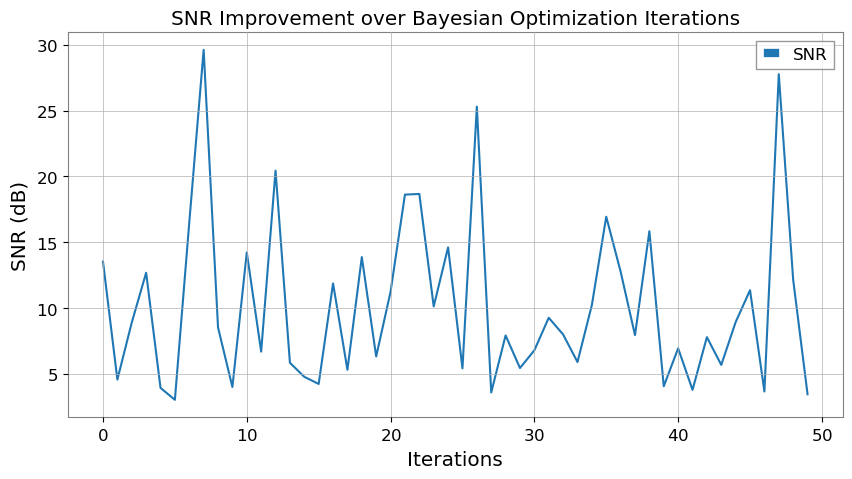

In [150]:
# Plot the SNR improvement over iterations
plt.figure(figsize=(10, 5))
plt.plot(snr_history, label='SNR')
plt.xlabel('Iterations')
plt.ylabel('SNR (dB)')
plt.title('SNR Improvement over Bayesian Optimization Iterations')
plt.legend()
plt.show()